# Taller

## Recapitulando clustering
- Crear una matriz de distancia usando criterio de enlace
    - ```method```: como calcular la proximidad de los clusters
    - ```metric```: metrica de distancia
    - ```optimal_ordering```: Orden de los puntos 
- Tipos de method
    - single: basado en los 2 objetos mas cercanos
    - complete: basado en los dos objetos mas lejanos 
    - average: basado en la media aritmetica de todos los objetos 
    - centroids: basado en la media geometrica de todos los objetos 
    - median: basado en la median de todos los objetos 
    - ward: basado en la suma de cuadrado 

# Agrupación en el conjunto de datos del vehículo

Imagine que un fabricante de automóviles ha desarrollado prototipos para un vehículo nuevo. Antes de introducir el nuevo modelo en su gama, el fabricante quiere determinar qué vehículos existentes en el mercado se parecen más a los prototipos, es decir, cómo se pueden agrupar los vehículos, qué grupo es el más similar al modelo y, por tanto, qué modelos. estarán compitiendo contra ellos.

Nuestro objetivo aquí es utilizar métodos de agrupamiento para encontrar los grupos de vehículos más distintivos. Resumirá los vehículos existentes y ayudará a la fabricación a tomar decisiones sobre nuevos modelos de forma sencilla.

### Descargar datos
Para descargar los datos, usaremos **`!wget`**. Estos datos se encuentran alojado en una API: IBM Object Storage.
__ ¿Lo sabían? __ Cuando se trata de aprendizaje automático, es probable que trabaje con grandes conjuntos de datos. Como empresa, ¿dónde puede alojar sus datos? IBM ofrece una oportunidad única para las empresas, con 10 Tb de IBM Cloud Object Storage: [Pueden registrarse aqui](http://cocl.us/ML0101EN-IBM-Offer-CC)

In [1]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2021-09-23 14:03:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2021-09-23 14:03:43 (315 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



# Leer los datos

In [5]:
import pandas as pd

filename = 'cars_clus.csv'
#Lectura
pdf = pd.read_csv(filename)
print ("Shape: ", pdf.shape)
pdf.head(5)

Shape:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


Los features incluyen:
- price en thousands (price)
- engine size (engine_s)
- horsepower (horsepow)
- wheelbase (wheelbas)
- width (width)
- length (length)
- curb weight (curb_wgt)
- fuel capacity (fuel_cap) 
- fuel efficiency (mpg).

# Data cleaning

1. Observando el proceso que se observa en el codigo de abajo que pueden concluir de que se realizo ?

In [6]:
print ("Shape antes de cleaning: ", pdf.shape)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape despues de cleaning: ", pdf.shape)
pdf.head(5)

Shape antes de cleaning:  (159, 16)
Shape despues de cleaning:  (117, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


**Respuesta**

R// Se eliminan los nulos y luego se resetea el indice para que queden bien numerados.

# Feature selection

2. Seleccionar las columnas ``engine_s,  horsepow, wheelbas, width, lenght, curb_wgt, fuel_cap y mpg`` y guardarlas en el dataset ``featureset``

In [7]:
import pandas as pd
import numpy as np

featureset = (pdf.loc[:,['engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg']])
featureset.head(5)


,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


# Clustering usando SCIpy

3. En esta parte usamos el paquete Scipy para agrupar el conjunto de datos:
Primero, calculamos la matriz de distancias.

Convertir a una matriz de distancias el dataset ``feature_set`` utilizando la funcion ``featureset.values`` y guardar el resultado en ``feature_mtx``



In [8]:
feature_mtx = featureset.values

Con la matriz creada previamente ``feature_mtx`` correr el codigo de acontinuación (Esto consiste en encontrar una matriz de distancias entre individuos/automoviles). El resultado se guarda en una matriz D. 

**Nota** Si todo marcha en orden no deberia haber problemas con los siguientes dos segmentos de código

In [9]:
import scipy
import scipy.spatial

leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])

for i in range(leng):

    for j in range(leng):

        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  """


In [10]:
D

array([[  0.        ,  87.9180919 ,  75.79845989, ...,  16.63650252,
         28.07638866,  26.83496095],
       [ 87.9180919 ,   0.        ,  17.0877409 , ...,  75.60022934,
        115.3194773 , 114.3440861 ],
       [ 75.79845989,  17.0877409 ,   0.        , ...,  62.15304698,
        103.39586278, 102.0832197 ],
       ...,
       [ 16.63650252,  75.60022934,  62.15304698, ...,   0.        ,
         43.35044747,  41.45224917],
       [ 28.07638866, 115.3194773 , 103.39586278, ...,  43.35044747,
          0.        ,   3.75905427],
       [ 26.83496095, 114.3440861 , 102.0832197 , ...,  41.45224917,
          3.75905427,   0.        ]])

En la agrupación aglomerativa, en cada iteración, el algoritmo debe actualizar la matriz de distancia para reflejar la distancia del grupo recién formado con los grupos restantes en el bosque.

Los siguientes métodos son compatibles con Scipy para calcular la distancia entre el grupo recién formado y cada uno:

     - single
     - complete
     - average
     - weighted
     - centroid
    
4. Utilizaremos __complete__ para nuestro caso, pero en una proxima oportunidad siéntanse libres de cambiarlo para ver cómo cambian los resultados. Calcular el objeto Z por medio de la siguiente estructura de código:

``import pylab``

``import scipy.cluster.hierarchy``

``z=scipy.cluster.hierachy.linkage(D,'complete')``



In [11]:
import pylab
import scipy.cluster.hierarchy

Z = scipy.cluster.hierarchy.linkage(D,'complete')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


Esencialmente, la agrupación jerárquica no requiere un número predeterminado de agrupaciones. Sin embargo, en algunas aplicaciones queremos una partición de clústeres disjuntos como en un clúster plano.

Entonces podemos usar una línea de corte:

In [12]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 51, 102,  95,  59,  83,   3,  46,  47,  38,  80,  99,  97,   4,
         7,  84,  20,  30,  39,  40,  82,   9,  19,  29,  70,  31,  89,
        56,  78,  55,  71,  32, 108,  76,  41,  50,  13,  66,  22,  44,
        33,  73,  88,  90,  75,  81,  14,  77,  23,  58,  60,  87,  96,
        12,  52,  64, 104,  28,  42,  48,  94, 103,   8,   5, 106,  26,
        68,  65,  92,  72,  85,  35,  15,  16,  74,  88,  91,  37,  43,
       100,   6,   2,  17,  69, 101,  37,  34,  67,  79,  45,  49,  55,
        56,  66,  63,  36,  82,  86,  98, 107,   1,   1,  10,  11,  18,
        19,  57,  93,  53,  54,  21,  61, 105,  24,  27,  62,  25,  24],
      dtype=int32)

In [13]:
# Determinar clusters
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 4, 4, 3, 4, 1, 3, 3, 3, 4, 4, 4, 1, 1, 4, 2, 3, 3, 3, 4, 1, 2,
       2, 3, 3, 4, 3, 4, 3, 3, 3, 5, 4, 3, 3, 2, 3, 2, 3, 3, 3, 4, 4, 3,
       4, 2, 4, 2, 3, 3, 4, 4, 2, 3, 3, 4, 2, 3, 3, 4, 4, 1, 1, 4, 2, 3,
       3, 4, 3, 4, 3, 2, 2, 3, 4, 4, 3, 3, 4, 1, 1, 2, 3, 4, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 2, 2, 2, 2, 3, 4, 3, 3, 2,
       3, 4, 2, 2, 3, 2, 2], dtype=int32)

# Dendrograma

5. Utilizar el objeto ``Z`` creado previamente en la funcion ``scipy.cluster.hierarchy.dendrogram`` para obtener el dendrograma para ello pueden utilizar de ayuda el siguiente código:
`

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 2.9442215143236257, 2.9442215143236257, 0.0],
  [0.0, 24.750421758866707, 24.750421758866707, 2.9442215143236257],
  [0.0, 117.4460267409197, 117.446026740

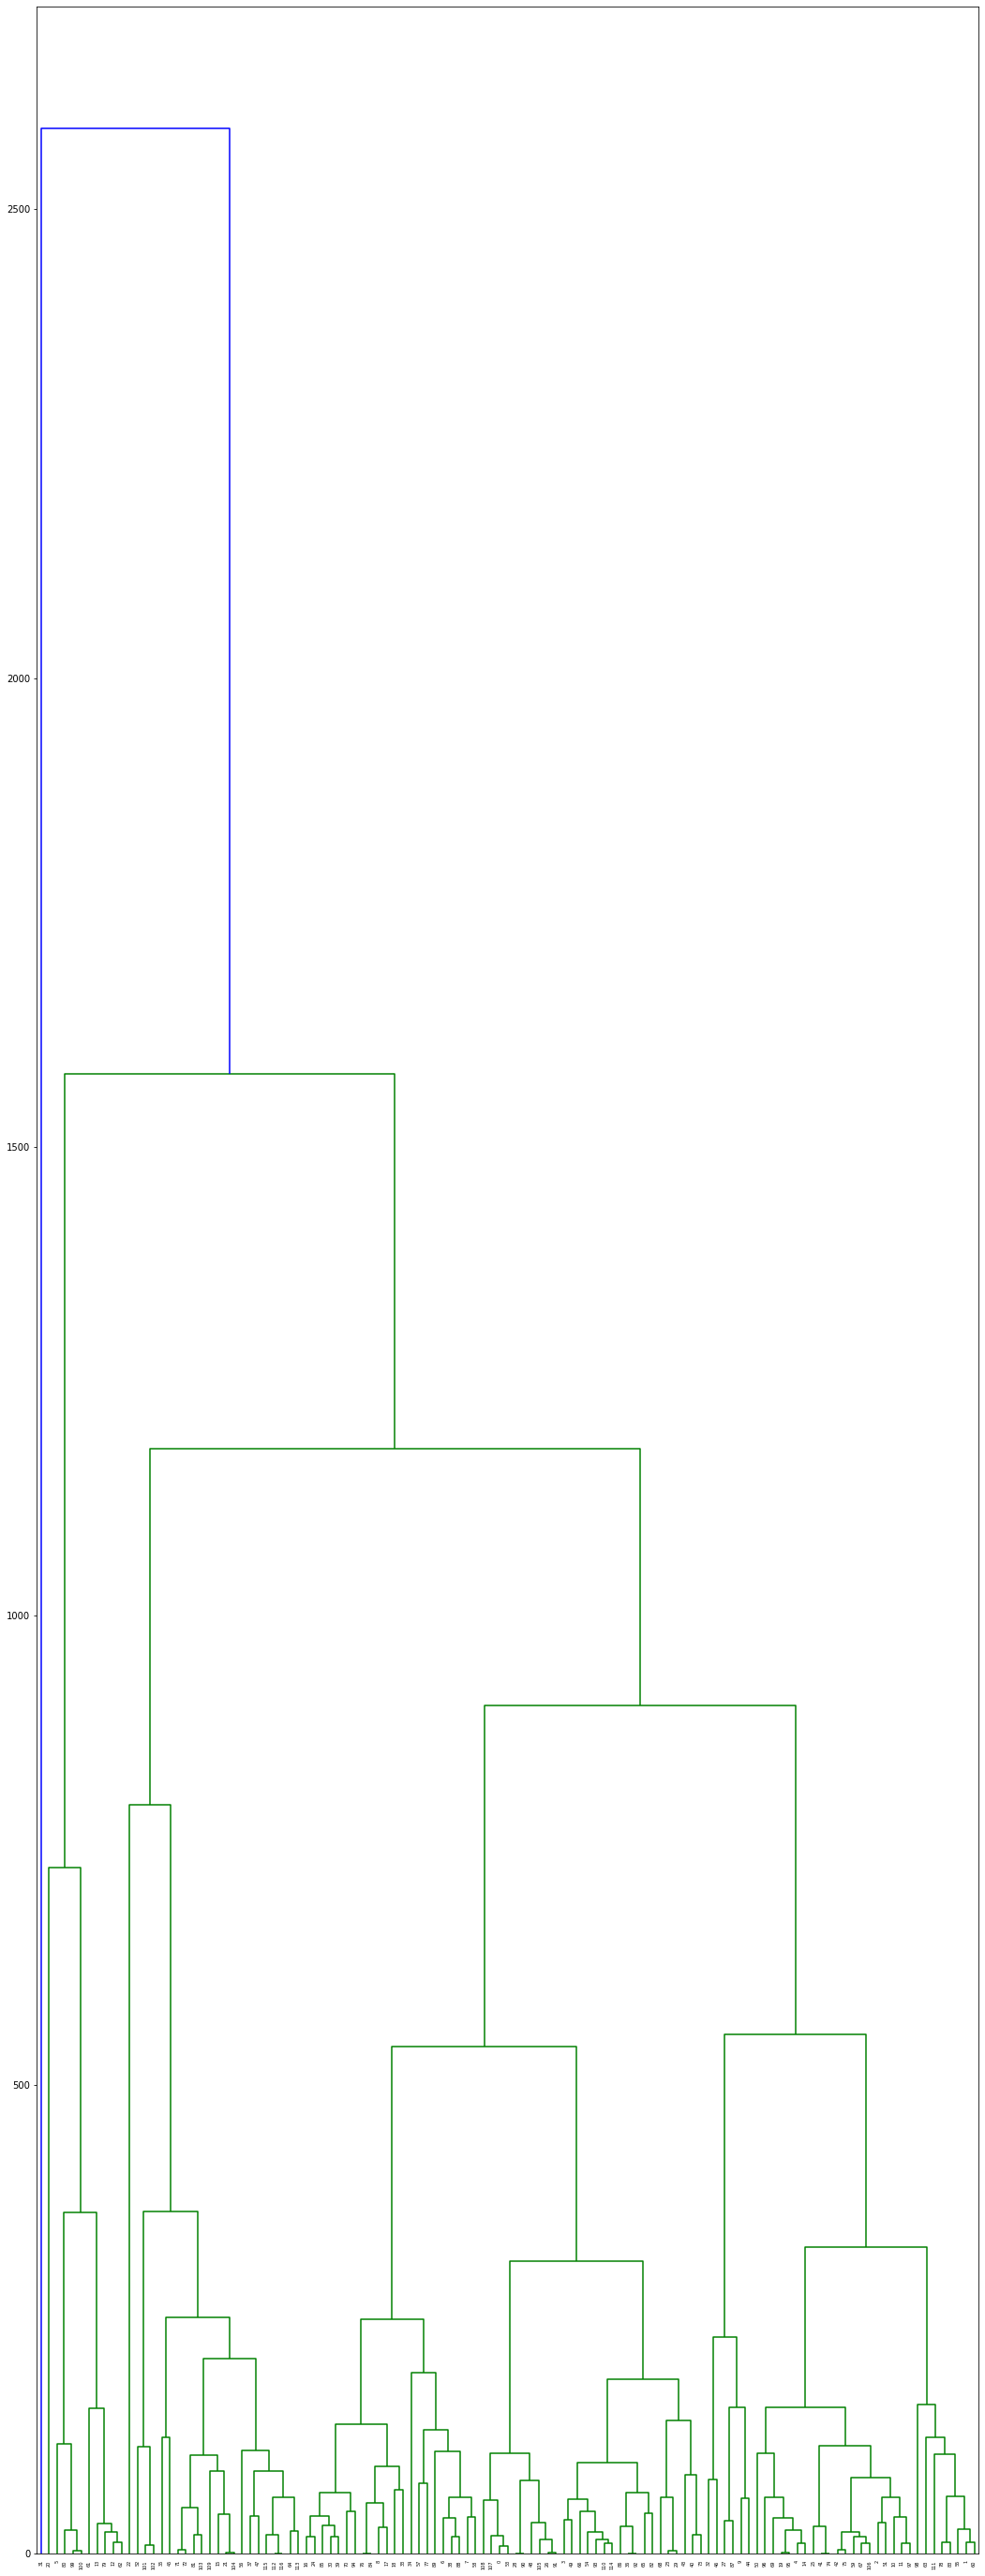

In [14]:
fig = pylab.figure(figsize=(18,50))

def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

scipy.cluster.hierarchy.dendrogram(Z,)

# Usando scikit learn

Ahora obtenemos la matriz de distancias usando scikit learn

In [15]:
from scipy.spatial import distance_matrix 

dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[  0.          87.9180919   75.79845989 ...  16.63650252  28.07638866
   26.83496095]
 [ 87.9180919    0.          17.0877409  ...  75.60022934 115.3194773
  114.3440861 ]
 [ 75.79845989  17.0877409    0.         ...  62.15304698 103.39586278
  102.0832197 ]
 ...
 [ 16.63650252  75.60022934  62.15304698 ...   0.          43.35044747
   41.45224917]
 [ 28.07638866 115.3194773  103.39586278 ...  43.35044747   0.
    3.75905427]
 [ 26.83496095 114.3440861  102.0832197  ...  41.45224917   3.75905427
    0.        ]]


6. Utilizar el metodo ``AgglomerativeClustering`` visto en clase con ``n_clusters`` el número apropiado que consideren según en dendograma creado previamente y con propiedad ``linkage='complete'``. Guardar el modelo con el nombre``agglom``. Ajustar el modelo a los datos ``feature_mtx`` y obtener las predicciones con la funcion ``agglom.labels_``

In [22]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters = 9, linkage = 'complete')

agglom_predictions = agglom.fit_predict(feature_mtx)
agglom_predictions

array([2, 0, 0, 3, 0, 1, 0, 0, 3, 6, 0, 0, 7, 7, 0, 2, 3, 3, 3, 0, 1, 2,
       4, 3, 3, 0, 2, 6, 2, 3, 3, 5, 6, 3, 0, 8, 3, 2, 0, 3, 3, 0, 0, 3,
       6, 8, 6, 2, 2, 2, 0, 0, 2, 2, 3, 0, 2, 0, 0, 0, 0, 7, 7, 0, 2, 3,
       3, 0, 3, 0, 3, 2, 2, 3, 0, 0, 3, 0, 0, 7, 1, 2, 3, 0, 3, 3, 3, 6,
       0, 0, 2, 2, 3, 3, 3, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 6, 2, 2, 3, 2, 2])

7. Crear una columna en el dataset pdf que se llame ``cluster_`` con base en los labels obtenidos con ``agglom.labels_''

In [35]:
import numpy as np
import pandas as pd

pdf['cluster_'] = pd.DataFrame(agglom_predictions)
pdf.head(5)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,2
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,0


8. Utilizar el siguiente codigo (Primero deben entenderlo) para crear una grafica de dispersion entre ``mpg`` y ``horsepow`` donde se proyecta como tercera variable el ``price``. Con base en esta grafica obtener una descripcion de cada cluster.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

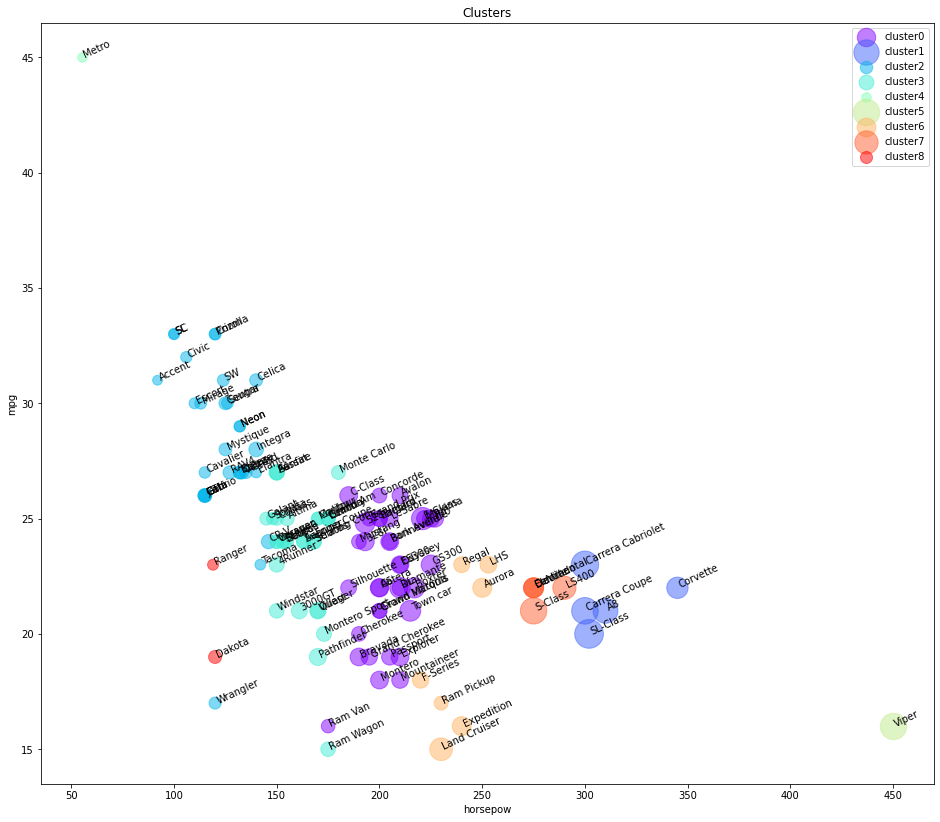

In [38]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Figura de tamaño 16 inches por 14 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

**Respuesta**





**Cluster 0**

Son los autos que en promedio tienen buena eficiencia del combustible y una buena cantidad de caballos de fuerza

**Cluster 1**

Son los autos con mas caballos de fuerza y un rendimiento en gasolina casi promedio

**Cluster 2**

Son autos con buen rendimiento en gasolina pero estan por debajo del promedio en caballos de fuerza

**Cluster 3 y 4**

En esta categoria, los autos tienen el rendimiento de gasolina promedio pero tienen mas caballos de fuerza que los del cluster 2 pero menos que el promedio (cluster 0)

**Cluster 5**

En mi opinion parece un valor atipico, de una marca de autos con la mayor cantidad de caballos de fuerza pero con uno de los peores rendimientos de gasolina.

**Cluster 6**

Son autos con mas caballos de fuerza que el promedio (cluster 0 ) pero en cuanto al rendimiento de la gasolina se cuenta con una subdivision en:

**A)** autos con rendimiento promedio de la gasolina 

**B)** autos con muy bajo rendimiento de gasolina. Inclusive llegando a tener en este grupo al carro con el peor rendimiento de gasolina de toda la grafica.

**Cluster 7**

Son los autos con muchos caballos de fuerza y con mejor rendimiento en gasolina. Son muy similares al cluster 1 pero ligeramente menos veloces (menos caballos de fuerza)

**Cluster 8**

Son autos con caballos de fuerza muy por debajo del promedio y con dos variantes en cuanto a rendimiento de la gasolina:

**A)** autos con rendimiento casi promedio de la gasolina 

**B)** autos con rendimiento debajo del promedio

9. Obtener un conteo para cada cluster y analizar si las estructuras son balanceadas? Porque?